In [1]:
### Lucas Camargo Sodre ###
# pos 

In [2]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

C:\Users\alfred\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df = pd.read_csv('dados_mamiferos_treino.csv')

In [4]:
df.head()

,ID,nome,sangue,bota_ovo,voa,mora_agua,poder,classificacao
0,1,humano,1,2,2,2,100.0,1
1,2,cobra,2,1,2,2,24.5,0
2,3,baleia,1,2,2,1,50.2,1
3,4,sapo,1,1,2,3,2.5,0
4,5,morcego,1,2,1,2,33.9,1


In [5]:
df1 = df

In [6]:
df1.head()

,ID,nome,sangue,bota_ovo,voa,mora_agua,poder,classificacao
0,1,humano,1,2,2,2,100.0,1
1,2,cobra,2,1,2,2,24.5,0
2,3,baleia,1,2,2,1,50.2,1
3,4,sapo,1,1,2,3,2.5,0
4,5,morcego,1,2,1,2,33.9,1


In [7]:
nome_tabelas = {}
nome_tabelas = pd.DataFrame(nome_tabelas)
nome_tabelas['nome'] = df1['nome']

In [8]:
nome_tabelas

,nome
0,humano
1,cobra
2,baleia
3,sapo
4,morcego
5,pombo
6,gato
7,tartaruga
8,pinguim
9,porco-espinho


In [9]:
df1.drop('nome', inplace=True, axis=1)

In [10]:
df1

,ID,sangue,bota_ovo,voa,mora_agua,poder,classificacao
0,1,1,2,2,2,100.0,1
1,2,2,1,2,2,24.5,0
2,3,1,2,2,1,50.2,1
3,4,1,1,2,3,2.5,0
4,5,1,2,1,2,33.9,1
5,6,1,1,1,2,30.7,0
6,7,1,2,2,2,40.3,1
7,8,2,1,2,3,10.5,0
8,9,1,1,2,3,10.3,0
9,10,1,2,2,2,25.9,1


In [11]:
df1.isnull().values.any()

False

In [12]:
df1.dtypes

ID                 int64
sangue             int64
bota_ovo           int64
voa                int64
mora_agua          int64
poder            float64
classificacao      int64
dtype: object

In [13]:
modelo_v1 = GaussianNB()

In [14]:
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

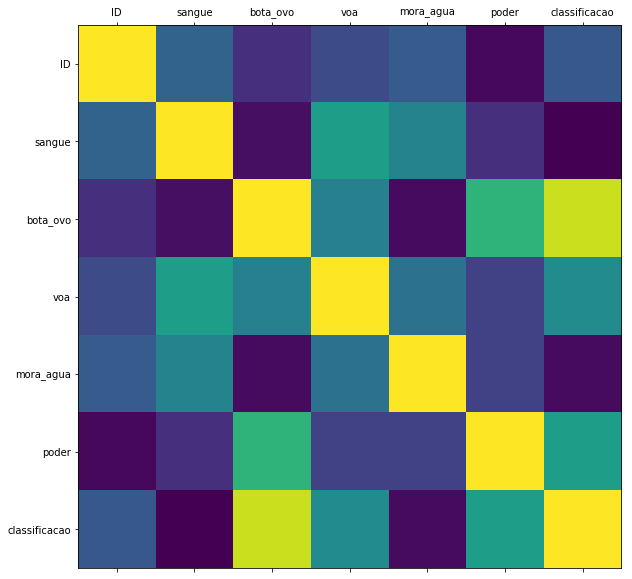

In [15]:
plot_corr(df1)

In [16]:
atributos = ['sangue','bota_ovo','voa','mora_agua']

In [17]:
atrib_prev = ['classificacao']

In [18]:
X = df[atributos].values
Y = df[atrib_prev].values

In [19]:
split_test_size = 0.30

In [20]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [21]:
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None)

In [22]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))

Exatidão (Accuracy): 0.9091


In [23]:
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Accuracy): 1.0000


In [24]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [26]:
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))

Exatidão (Accuracy): 1.0000


In [29]:
y = {}
y = pd.DataFrame(y)
y["poder"] = df1["poder"]
clf = svm.SVC(gamma='scale')